# Importing necessary libraries for our project

In [1]:
import tensorflow as tf

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
classname = dataset.class_names
classname

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Displaying images in datset


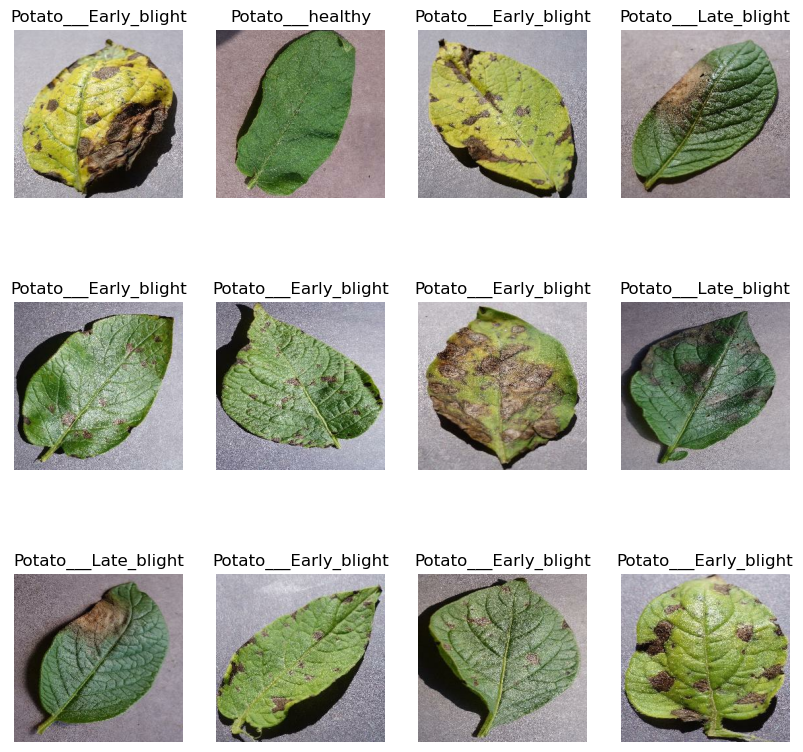

In [5]:
plt.figure(figsize=(10,10))
for image, label in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(classname[label[i]])
        plt.axis("off")

In [6]:
len(dataset)

68

### SPLITTING DATSET INTO TRAINING, VALIDATION , TESTING 

In [7]:
def split_dataset(ds,train_size=0.8,val_size=0.1,test_size=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_dst = int(train_size * ds_size)
    val_dst = int(val_size * ds_size)
    
    train_ds = ds.take(train_dst)
    val_ds = ds.skip(train_dst).take(val_dst)
    test_ds = ds.skip(train_dst).skip(val_dst)
    
    return train_ds,val_ds,test_ds
    

In [8]:
train_ds,val_ds,test_ds = split_dataset(dataset)

In [9]:
len(train_ds)

54

len(val_ds)

In [10]:
len(test_ds)

8

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

#### RESIZE AND RESCALING SCANNED IMAGES

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

### DATA AUGUMENTATION

In [13]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### MODEL 

In [14]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

In [15]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape = input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [18]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/50
54/54 [==============================] - 31s 295ms/step - loss: 0.9076 - accuracy: 0.4983 - val_loss: 0.7350 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 12s 214ms/step - loss: 0.6761 - accuracy: 0.6944 - val_loss: 0.4329 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 11s 199ms/step - loss: 0.4709 - accuracy: 0.7946 - val_loss: 0.4325 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 11s 199ms/step - loss: 0.3369 - accuracy: 0.8628 - val_loss: 0.3373 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 11s 199ms/step - loss: 0.2423 - accuracy: 0.9045 - val_loss: 0.4297 - val_accuracy: 0.8281
Epoch 6/50
54/54 [==============================] - 11s 200ms/step - loss: 0.2349 - accuracy: 0.9138 - val_loss: 0.3720 - val_accuracy: 0.8490
Epoch 7/50
54/54 [==============================] - 11s 201ms/step - loss: 0.1340 - accuracy: 0.9485 - val_loss: 0.5653 - val_accuracy: 0.8021

54/54 [==============================] - 12s 225ms/step - loss: 0.0310 - accuracy: 0.9844 - val_loss: 0.5656 - val_accuracy: 0.8646
Epoch 42/50
54/54 [==============================] - 13s 234ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.1304 - val_accuracy: 0.9479
Epoch 43/50
54/54 [==============================] - 13s 233ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.0516 - val_accuracy: 0.9792
Epoch 44/50
54/54 [==============================] - 12s 229ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.1769 - val_accuracy: 0.9427
Epoch 45/50
54/54 [==============================] - 12s 229ms/step - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.0127 - val_accuracy: 0.9948
Epoch 46/50
54/54 [==============================] - 12s 225ms/step - loss: 0.0211 - accuracy: 0.9902 - val_loss: 0.0300 - val_accuracy: 0.9792
Epoch 47/50
54/54 [==============================] - 12s 229ms/step - loss: 0.0368 - accuracy: 0.9850 - val_loss: 0.0828 - val_accuracy: 0.9635
Epoc

In [19]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 40ms/step - loss: 0.1082 - accuracy: 0.9453


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
def predict(model,img):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array,0)
    
    predictions = model.predict(image_array)
    
    predicted_class = classname[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 47ms/step


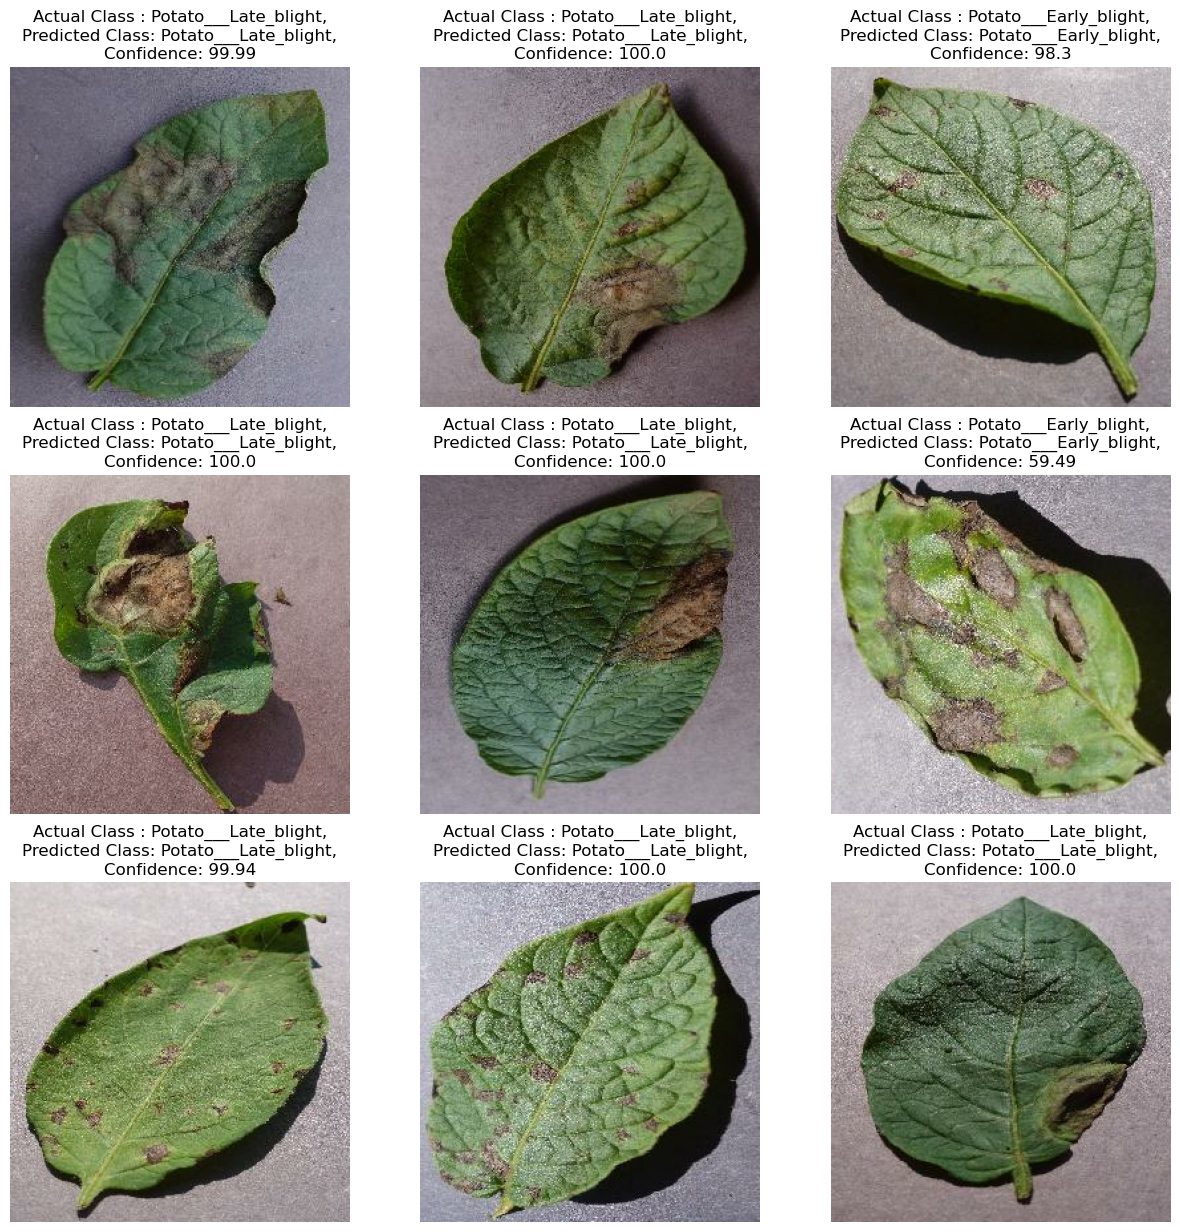

In [47]:
plt.figure(figsize=(15,15))
for images,label in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.axis("off")
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actualclass = classname[label[i]]
        
        plt.title(f"Actual Class : {actualclass},\nPredicted Class: {predicted_class},\nConfidence: {confidence}")
        

In [55]:
import os
modelversion=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{modelversion}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
